**<div class="alert alert-success">Function_Transformer</div>**

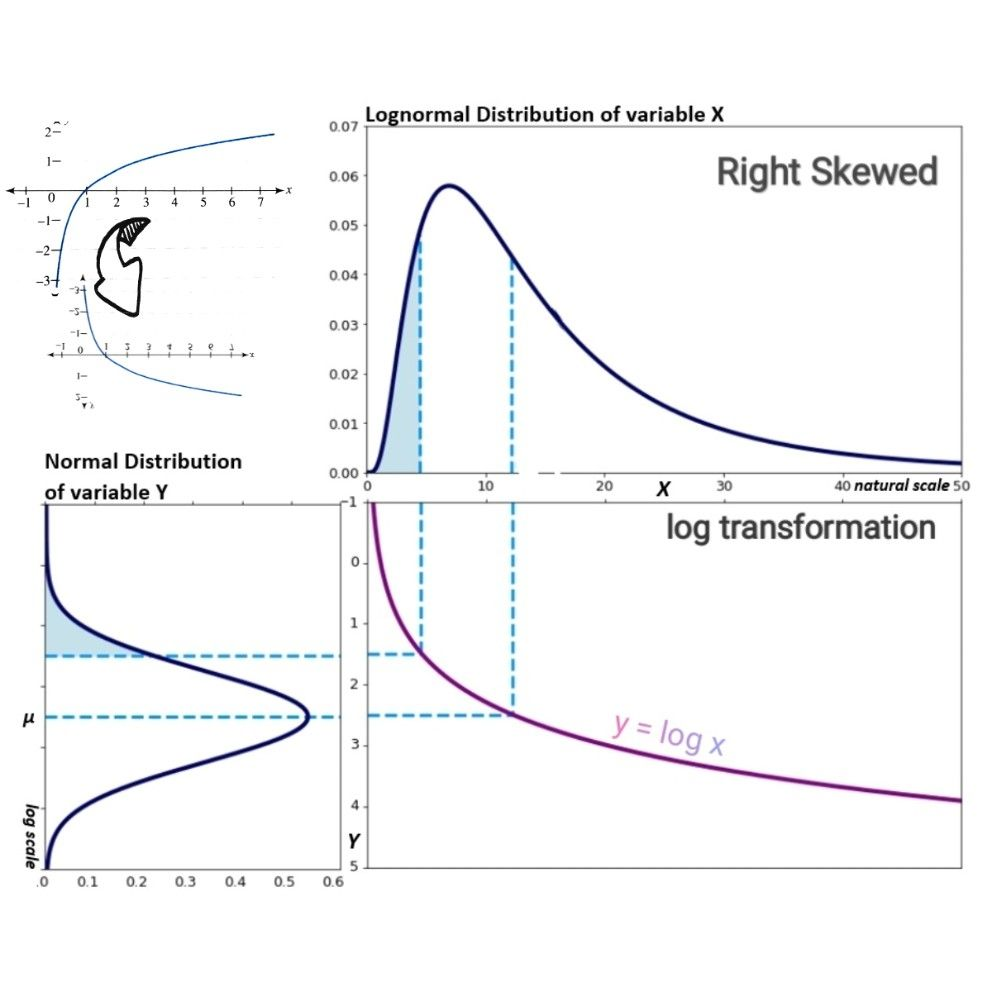

In [2]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

sns.set_theme()
sns.set_palette(palette = "rainbow")
%matplotlib inline

In [3]:
# Read csv file
df=pd.read_csv('/Users/sanjeet/Data_Science/2.Feature_Engineering/Function_Transformer/housing.csv')

In [4]:
# Top five row :-
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
# About data frame :-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
# Stats. Of data :-
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [7]:
# Skew function of Pandas
old_skew = df.skew().sort_values(ascending=False)
old_skew

LSTAT      0.905561
MEDV       0.775082
RM         0.081565
PTRATIO   -0.820578
dtype: float64

***
&#10148; Positive value means the distribution is skewed to the right. </br>
&#10148; Negative value means the distribution is skewed to the left. </br>
&#10148; 0 means perfect normal distribution. The bell shaped curve.
***

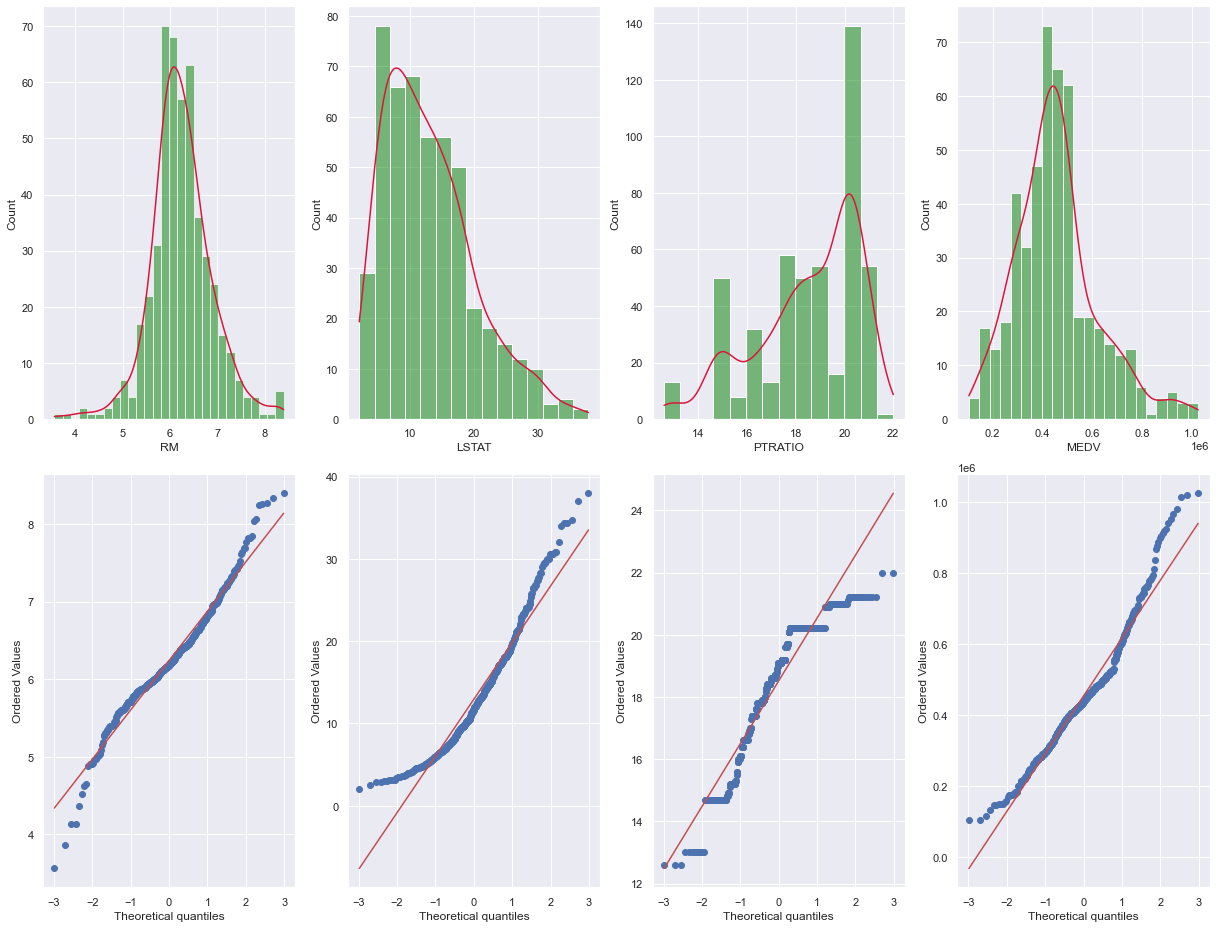

In [8]:
plt.figure(figsize=(17,13))
for i in list(enumerate(df.columns)):
    plt.subplot(2, 4, i[0]+1)
    ax = sns.histplot(data = df[i[1]], kde=True ,color='green') # Histogram with KDE line
    ax.lines[0].set_color('crimson')
    
for i in list(enumerate(df.columns)):
    plt.subplot(2, 4,i[0]+5)
    stats.probplot(df[i[1]], dist="norm", plot=plt)   # QQ Plot
    plt.title("")
plt.tight_layout()  
plt.show()

***
✅  LSTAT      0.905561   ( Right-Skewed) </br>

✅  MEDV       0.775082   ( Right-Skewed) </br>

✅  RM         0.081565   ( Normal)       </br>

✅  PTRATIO   -0.820578   ( left-Skewed)
***

> **Note:** <div class="alert alert-info">We can handle skewed data using mathematical transformers. I will discuss some of the best transformers that sklearn library provides us in order to handle skewed data. There are various types of Mathematical Transformers:- </div>

<mark>&#10148; **Function Transformers** </br></mark>

 * Log Transform

 * Reciprocal Transform

 * Square Transform

 * Sq Root Transform

 * Custom Transform

**<mark>&#10148; Power Transformers </br></mark>**

 * Box-Cox

 * Yeo-Johnson

**<mark>&#10148; Quantile Transformer </mark>**
***

In [9]:
# sklearn libraries :-
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

<div class="alert alert-info">1. Log Transformation </br>

**<mark>&#10148; Suitable for Right skewed data. </mark>**

</div>

In [12]:
# Log Function :-
def logTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    df_log = pd.DataFrame(logTr.fit_transform(df))
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    
    plt.subplot(1,2,2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
   
#     plt.subplot(2,2,3)
#     stats.probplot(df[feature], dist="norm", plot=plt) # QQ Plot
#     plt.title("QQ before Transformation", fontsize=15)
    
#     plt.subplot(2,2,4)
#     stats.probplot(df_log[:,1:3], dist="norm", plot=plt)   # QQ Plot
#     plt.title("QQ after Transformation", fontsize=15)
 
    
#    plt.tight_layout()  
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")

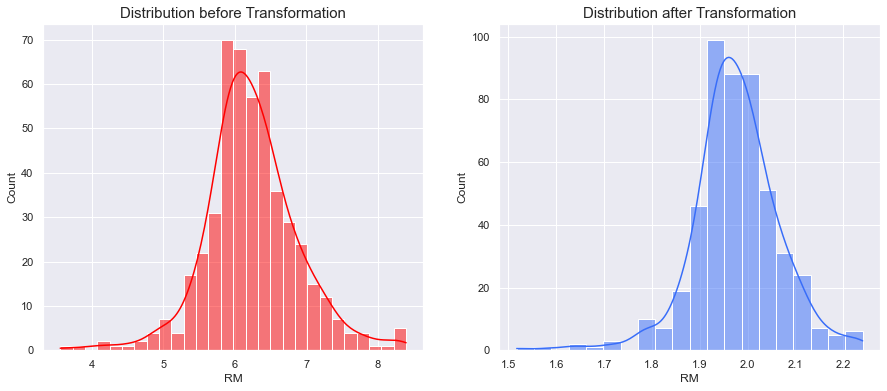

Skewness was 0.08 before & is -0.49 after Log transformation.


In [23]:
# Normal
logTrans(feature="RM")

😕😕

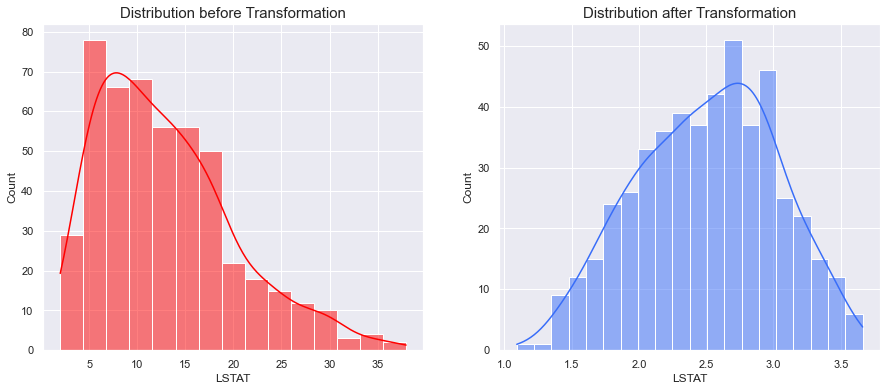

Skewness was 0.91 before & is -0.15 after Log transformation.


In [25]:
# Right Skewed
logTrans(feature="LSTAT")

🥳🥳🥳

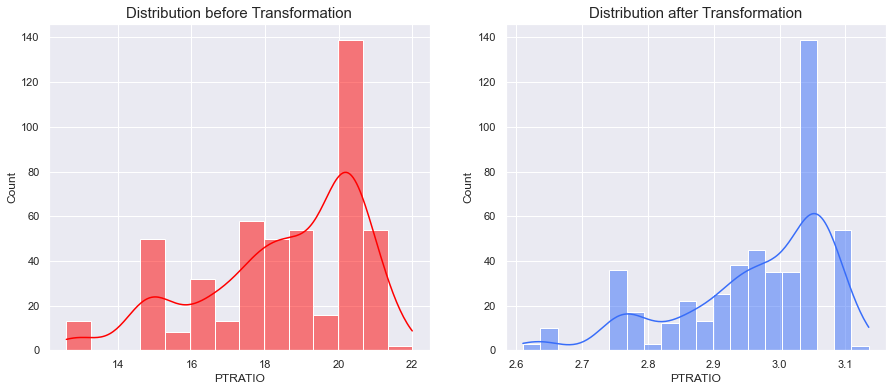

Skewness was -0.82 before & is -1.03 after Log transformation.


In [14]:
# Left Skewed :-
logTrans(feature="PTRATIO")

😕😕

<div class="alert alert-danger">Use Log transformation for left skewed data is not suitable. It will mess your data up!</div>

<div class="alert alert-info">2. Square Transformation </br>

**<mark>&#10148; Suitable for left skewed data. </mark>**

</div>

In [15]:
# Square Function :-
def squareTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.square), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_square = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_square,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_square.skew()[0],2)} after Square transformation.")

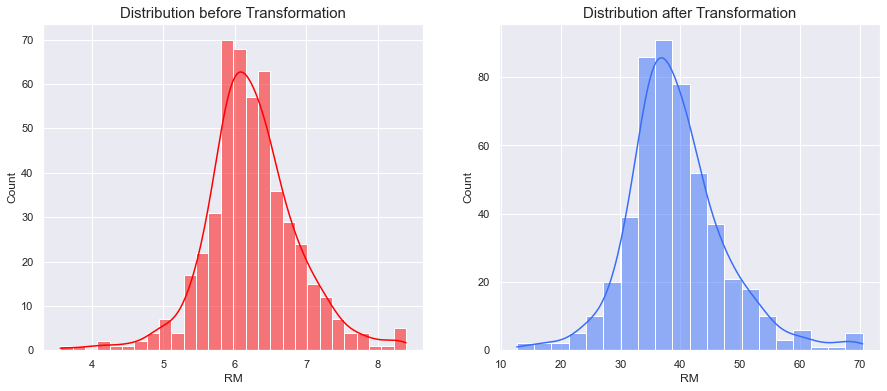

Skewness was 0.08 before & is 0.65 after Square transformation.


In [27]:
# Normal 
squareTrans(feature="RM")

😕😕

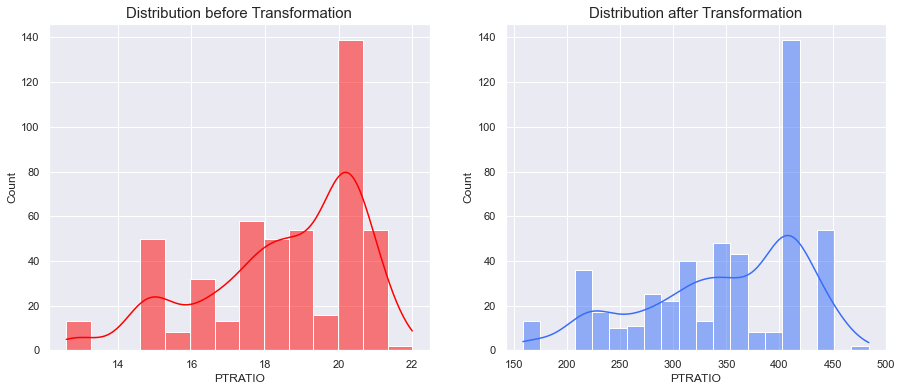

Skewness was -0.82 before & is -0.62 after Square transformation.


In [16]:
# Left-Skewed :-
squareTrans(feature="PTRATIO")

&#10148; Slightly improvement.

🙂🙂

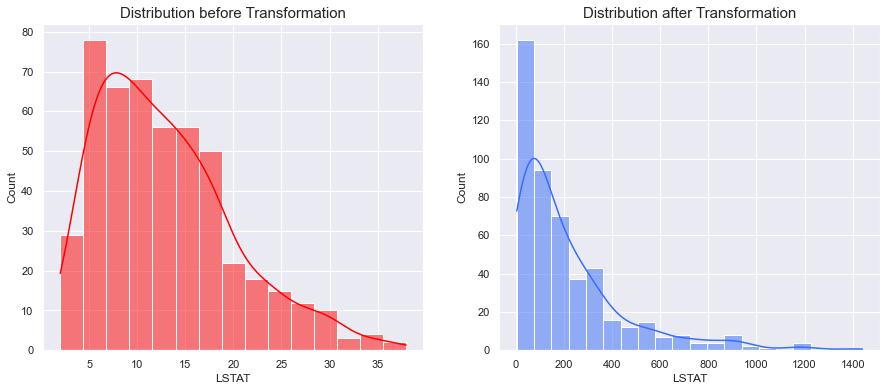

Skewness was 0.91 before & is 2.06 after Square transformation.


In [28]:
# Right Skewed :-
squareTrans(feature="LSTAT")

😕😕

<div class="alert alert-danger">Use Square transformation for Right skewed data is not suitable. It will mess your data up!</div>

<div class="alert alert-info">2. Cube Transformation </br>

**<mark>&#10148; Analysis </mark>**

</div>

In [19]:
# Cube Function :-
def cubeTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(lambda x: x**3), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_cube = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_cube,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_cube.skew()[0],2)} after cube transformation.")

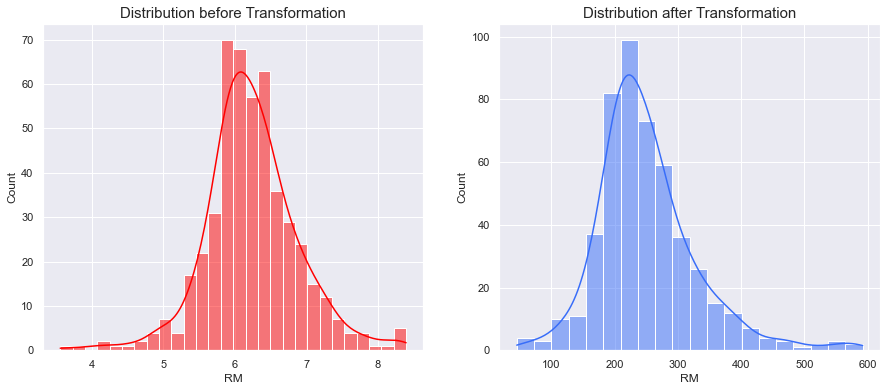

Skewness was 0.08 before & is 1.16 after cube transformation.


In [20]:
# Normal :-
cubeTrans(feature="RM")

😕😕

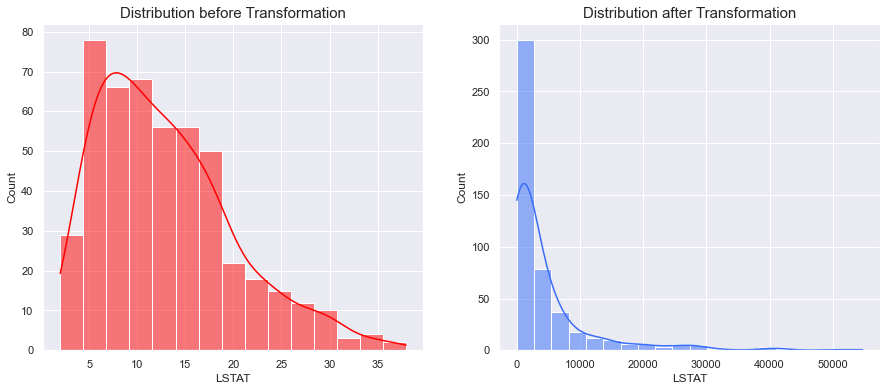

Skewness was 0.91 before & is 3.22 after cube transformation.


In [33]:
cubeTrans(feature="LSTAT")

😕😕

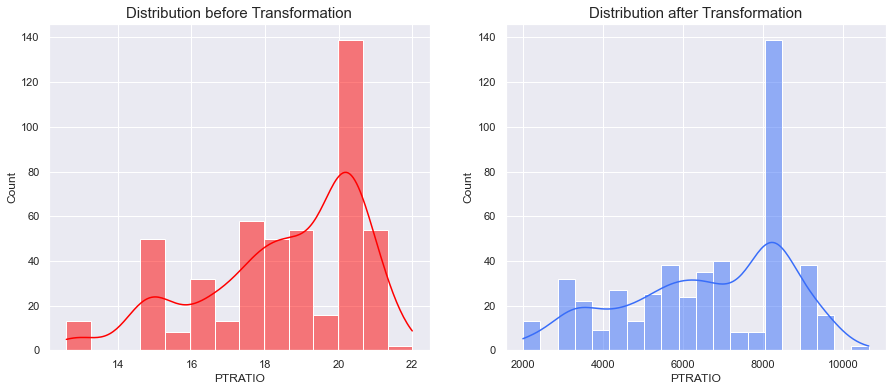

Skewness was -0.82 before & is -0.44 after cube transformation.


In [35]:
cubeTrans(feature="PTRATIO")

🥳🥳🥳

<div class="alert alert-info">2. Reciprocal Transformation </br>

**<mark>&#10148; Analysis </mark>**

</div>

In [43]:
# Reciprocal Function :-
def cubeTrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(lambda x: 1/x), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_cube = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_cube,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_cube.skew()[0],2)} after reciprocal.")

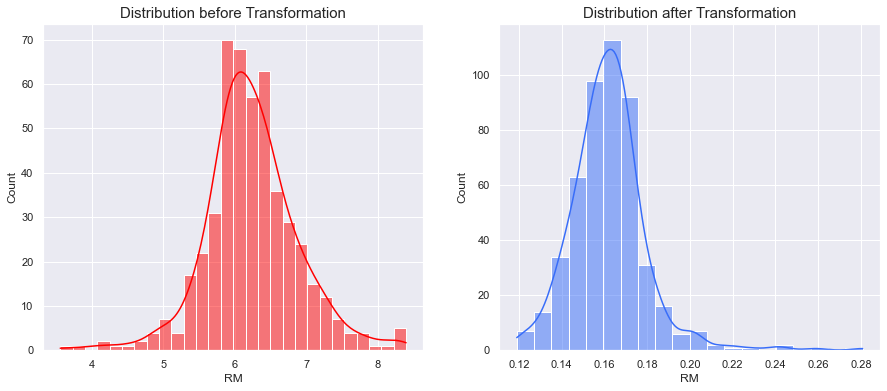

Skewness was 0.08 before & is 1.49 after reciprocal.


In [44]:
# Normal :-
cubeTrans(feature="RM")

😕😕

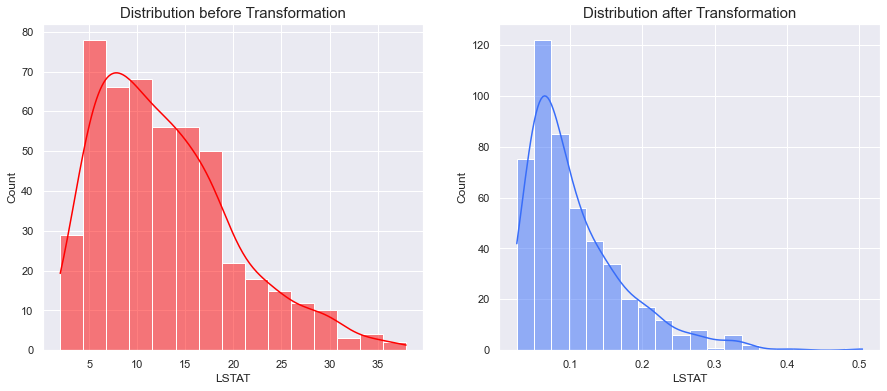

Skewness was 0.91 before & is 1.69 after reciprocal.


In [48]:
# Right :-
cubeTrans(feature="LSTAT")

😕😕

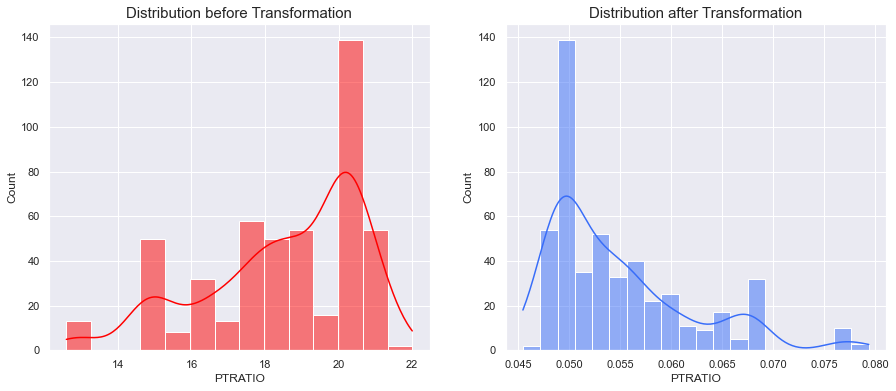

Skewness was -0.82 before & is 1.3 after reciprocal.


In [46]:
# Normal :-
cubeTrans(feature="PTRATIO")

**left Skewed -->> Right Skewed**

🥳 - After Reciprocal, we can apply log transformation in case of left skewed data

<div class="alert alert-info"> Box-Cox </div>

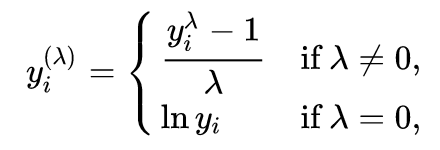

* Box-Cox cannot be used for negative values and 0.

* By default the PowerTransformer will standard scale the column so you need to specifically mention it if you do not want to scale.

In [50]:
from sklearn.preprocessing import PowerTransformer

In [52]:
def boxcoxtrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    boxcoxTr = PowerTransformer(method = "box-cox", standardize=True)

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_boxcox = pd.DataFrame(boxcoxTr.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_boxcox,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_boxcox.skew()[0],2)} after Box-cox transformation.")


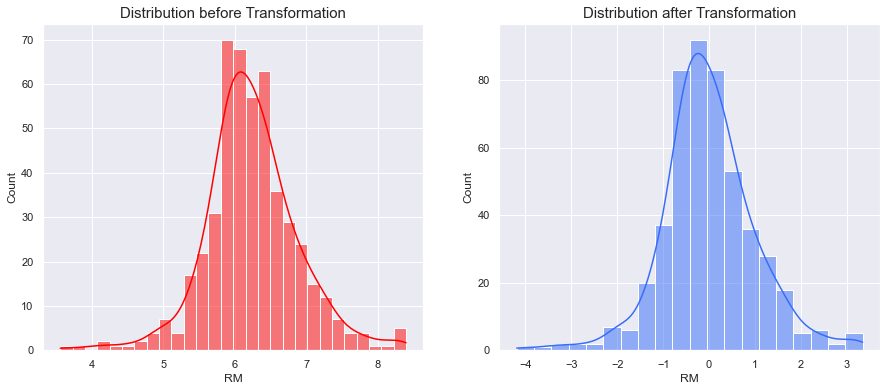

Skewness was 0.08 before & is 0.07 after Box-cox transformation.


In [53]:
boxcoxtrans(feature="RM")

🥳🥳🥳

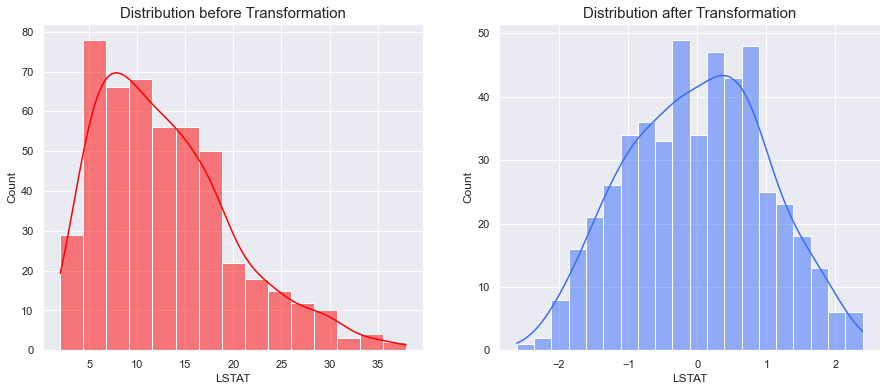

Skewness was 0.91 before & is -0.02 after Box-cox transformation.


In [56]:
boxcoxtrans(feature="LSTAT")

🥳🥳🥳

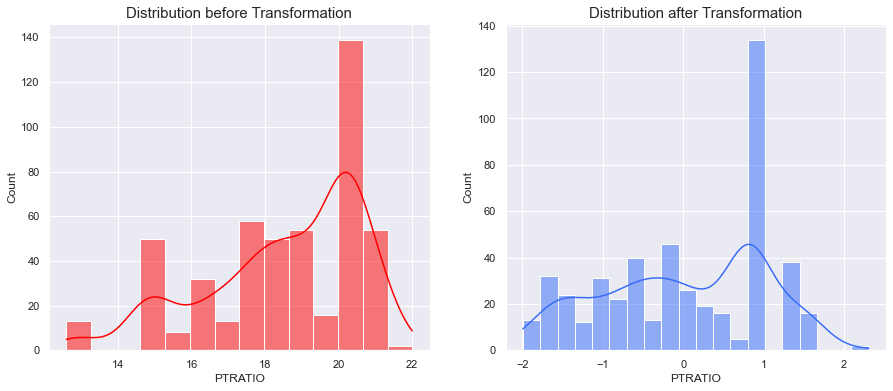

Skewness was -0.82 before & is -0.21 after Box-cox transformation.


In [58]:
boxcoxtrans(feature="PTRATIO")

🥳🥳🥳

<div class="alert alert-info"> Yeo-Johnson </div>

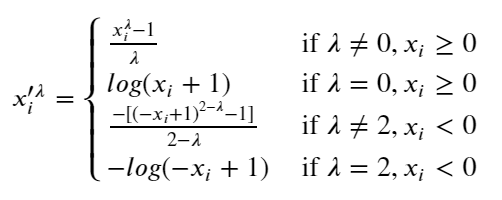

In [60]:
def yeojohntrans(feature):   # function to apply transformer and check the distribution with histogram and kdeplot
    
    yeojohnTr = PowerTransformer(standardize=True)   # not using method attribute as yeo-johnson is the default

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)
    
    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()
    
    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")

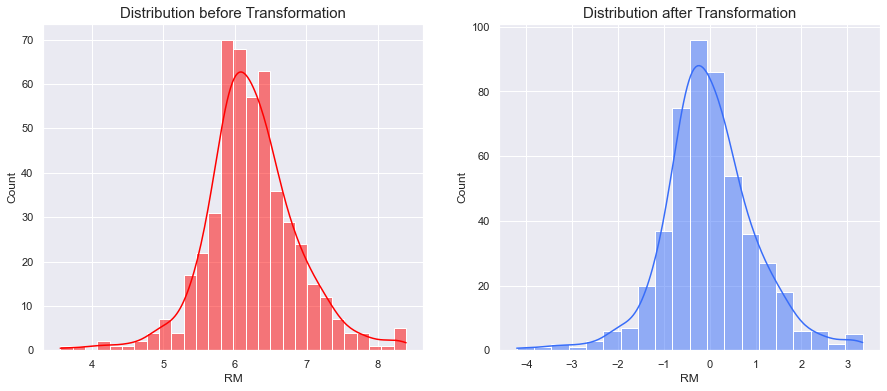

Skewness was 0.08 before & is 0.06 after Yeo-johnson transformation.


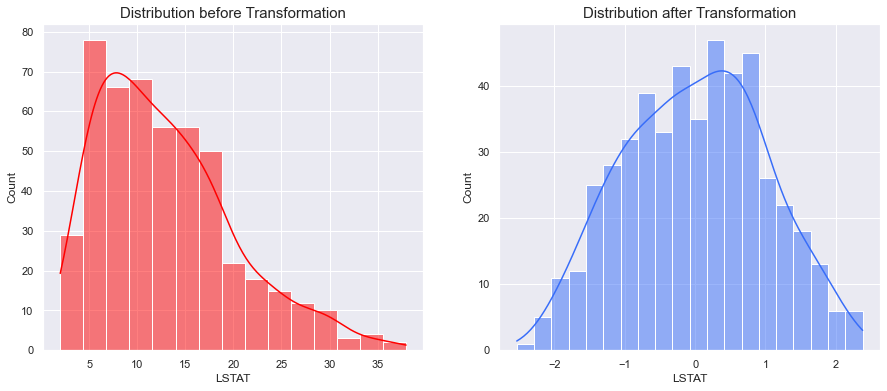

Skewness was 0.91 before & is -0.01 after Yeo-johnson transformation.


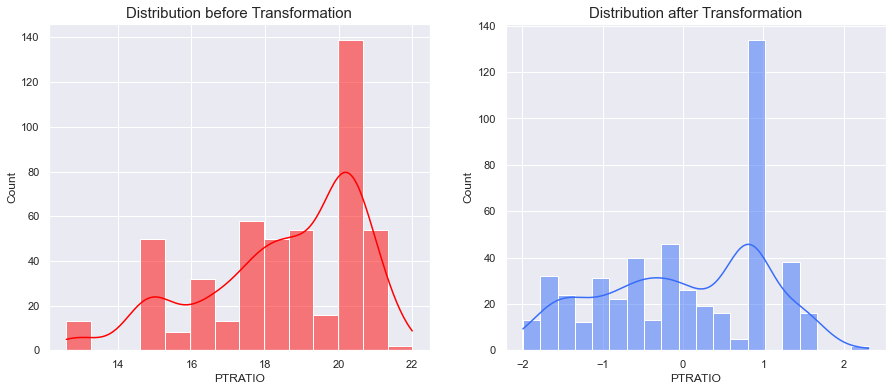

Skewness was -0.82 before & is -0.21 after Yeo-johnson transformation.


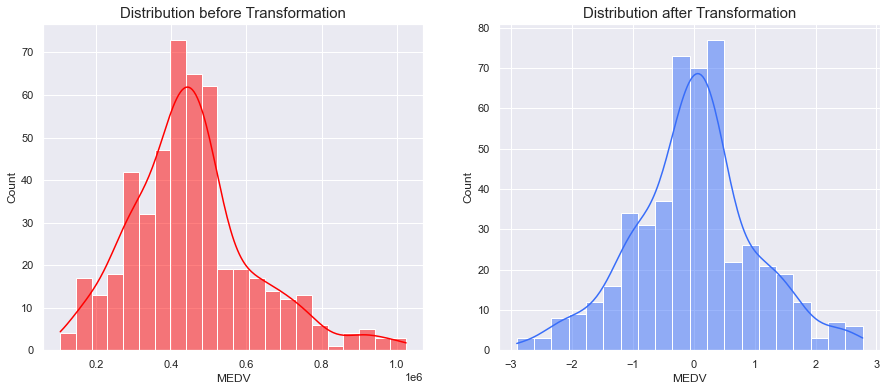

Skewness was 0.78 before & is 0.02 after Yeo-johnson transformation.


In [63]:
for i in df.columns[0:]:
    yeojohntrans(i)

**END**